# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

**Importante:** recuerda que un notebook es un informe, por lo que debes ir explicando lo que haces a medida que resuelves las consignas. Es importante que quien que lo lea entienda el flujo de trabajo, qué quisiste hacer. Recuerda, simple y conciso es una combinación ganadora. 

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

### Para poder analizar el valor de una propiedad debo analizar:
1. metros cuadrados cubiertos 
1. metros cuadrados totales
1. Cantidad de ambientes 
1. Clasificacion de los ambientes
1. Antiguedad
1. Geolocalizacion
1. Calidad de los materiales
1. Horientacion solar
1. Estado de la construccion
1. Ventilacion 
1. Servicios Publicos

Estos datos son impotantes desde mi punto de vista a la hora de tasar una vivienda y tambien son variables en las que pondría interes a la hora de hallar una vivienda.

**COMPLETA EN ESTA CELDA TU RESPUESTA**

---

<br />
<br />

# RESPONDER SECCIÓN 1 ANTES DE CONTINUAR
<br />
<br />

---

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.



0. Importa las librerías necesarias para trabajar en la consigna.

In [4]:
import numpy as np                     # Importo libreria Numpy        
import pandas as pd                    # Importo libreria Pandas       
import matplotlib.pyplot as plt        # Importo libreria Matplotlib   
import seaborn as sns                  # Importo libreria Seaborn      

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [6]:
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')   # Leo el DataFrame de propiedades Properati
data.head()                                                # Muestro las 5 primeras instancias 

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [7]:
print('Filas y Columnas:')
data.shape                              # Imprimo cuántas filas y columnas tiene

Filas y Columnas:


(146660, 19)

2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [8]:
print('Nombre de las columnas:\n') 

data.columns                             # Imprimo los indices de la columna

Nombre de las columnas:



Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [9]:
print('Valores faltantes por columna:\n') 
data.isna().sum()                           # Primero busco y luego agrupo los valores faltantes por columna

Valores faltantes por columna:



start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántas instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [10]:
data.property_type.count()         # Obtengo la cantidad de filas no vacias de tipo de propiedades 

146660

In [11]:
data.property_type.value_counts()  # Obtengo la cantidad de los diferentes tipos de propiedades 

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64

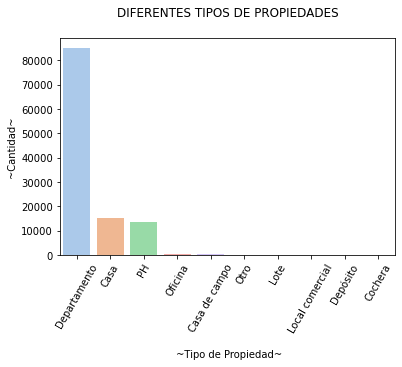

In [81]:
sns.countplot(data = data, x = "property_type",order = data['property_type'].value_counts().index ,palette="pastel") # Grafico la cantidad de los diferentes tipos de propiedades (Con una paleta de colores)
plt.title('DIFERENTES TIPOS DE PROPIEDADES\n')                   # Titulo del grafico
plt.xlabel('\n ~Tipo de Propiedad~')                           # Datos del eje X
plt.ylabel('~Cantidad~')                                       # Datos del eje Y
plt.xticks(rotation = 60)                                      # Roto 60° las etiquetas del eje X  
plt.show()

El tipo de propiedad predominante es claramente el departamento.

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

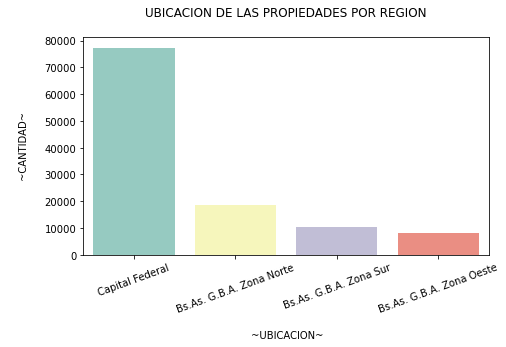

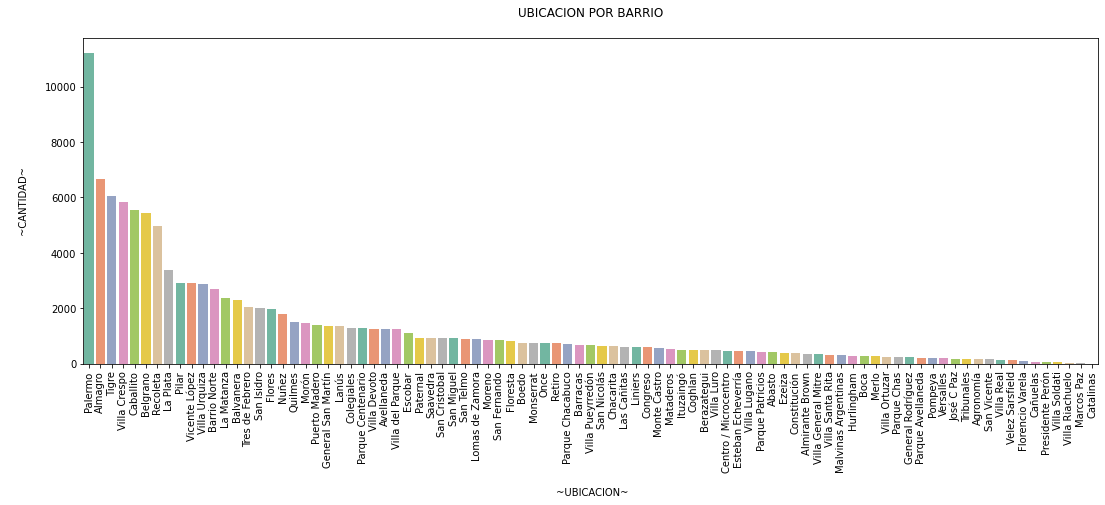

In [82]:

plt.figure(figsize = (16,4))                           # Configuro el tamaño del grafico
plt.subplot(1,2,1)                                     # Configuro la disposicion del primer grafico

sns.countplot(data=data,x = 'l2' ,order = data['l2'].value_counts().index, palette = 'Set3')  # Grafico la cantidad de propiedades por region (Con una paleta de colores)
plt.title('UBICACION DE LAS PROPIEDADES POR REGION\n')   # Titulo del grafico
plt.xlabel('\n ~UBICACION~')                           # Datos del eje X
plt.ylabel('\n ~CANTIDAD~ \n')                         # Datos del eje Y
plt.xticks(rotation = 20)                              # Roto 20° las etiquetas del eje X 
plt.show()



plt.figure(figsize = (40,6))                           # Configuro el tamaño del grafico
plt.subplot(1,2,2)                                     # Configuro la disposicion del segundo grafico

sns.countplot(data=data,x = 'l3',order = data['l3'].value_counts().index, palette = 'Set2')    # Grafico la cantidad de propiedades por barrios 
plt.title('UBICACION POR BARRIO\n')                      # Titulo del grafico
plt.xlabel('\n ~UBICACION~')                           # Datos del eje X
plt.ylabel('\n ~CANTIDAD~ \n')                         # Datos del eje Y
plt.xticks(rotation = 90)                              # Roto 90° las etiquetas del eje X 
plt.show()

En el gráfico superior se observa que Capital Federal tiene la mayor cantidad propiedades y en el inferior vemos a Palermo como el barrio con más propiedades en el dataset.

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [14]:
mask = data['l2'] == 'Capital Federal' # Genero una mascara para seleccionar la region con mas propiedades 
data_cap = data[mask]                  # Utilizo la mascara y guardo en un nuevo DataFrame
#data_cap.head()                       # Utilice esta linea para testear 


In [15]:
data = data.dropna()
prop_three = ['Departamento','PH','Casa']                          # Selecciono los 3 tipos de propiedades mas abundantes
data_new = data_cap[data_cap['property_type'].isin(prop_three)]    # Creo el DataFrame pedido 
print('Filas y Columnas:')
data_new.shape                                                     # Imprimo las filas y columnas del nuevo DataFrame

Filas y Columnas:


(91485, 19)

In [16]:
#Realiazo la eliminacion de columnas que no utilizare
data_new.drop({'lat','lon','start_date','end_date','created_on','title','description','operation_type'},1, inplace = True)

C:\Users\usuario\miniconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

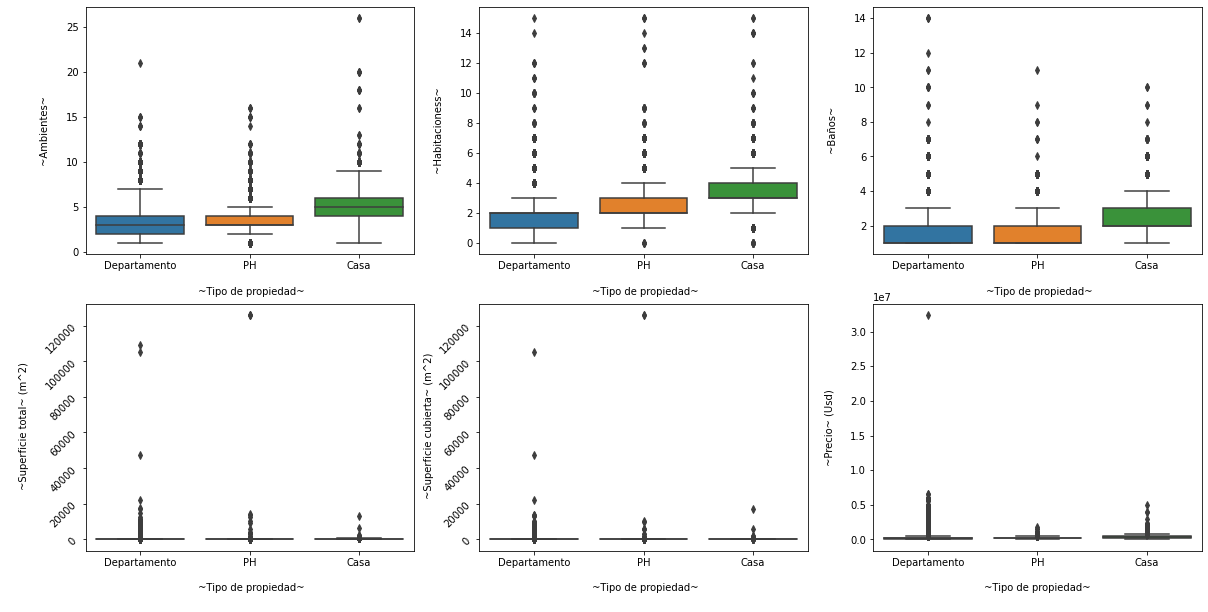

In [80]:
#sns.pairplot(data_new)
plt.figure(figsize = (20,10))

plt.subplot(2,3,1)
sns.boxplot(x=data_new.property_type,y=data_new.rooms,data=data_new)
plt.xlabel('\n ~Tipo de propiedad~')                  
plt.ylabel('\n ~Ambientes~ \n')                    

plt.subplot(2,3,2)
sns.boxplot(x=data_new.property_type,y=data_new.bedrooms,data=data_new)
plt.xlabel('\n ~Tipo de propiedad~')                   
plt.ylabel('\n ~Habitacioness~ \n')                        

plt.subplot(2,3,3)
sns.boxplot(x=data_new.property_type,y=data_new.bathrooms,data=data_new)
plt.xlabel('\n ~Tipo de propiedad~')                  
plt.ylabel('\n ~Baños~ \n')  

plt.subplot(2,3,4)
sns.boxplot(x=data_new.property_type,y=data_new.surface_total,data=data_new)
plt.xlabel('\n ~Tipo de propiedad~')                
plt.ylabel('\n ~Superficie total~ (m^2)\n') 
plt.yticks(rotation = 45)

plt.subplot(2,3,5)
sns.boxplot(x=data_new.property_type,y=data_new.surface_covered,data=data_new)
plt.xlabel('\n ~Tipo de propiedad~')                  
plt.ylabel('\n ~Superficie cubierta~ (m^2)') 
plt.yticks(rotation = 45)

plt.subplot(2,3,6)
sns.boxplot(x=data_new.property_type,y=data_new.price,data=data_new)
plt.xlabel('\n ~Tipo de propiedad~ \n')                  
plt.ylabel('\n ~Precio~ (Usd) \n')  
plt.show()

En todas las comparaciones podemos encontrarnos con outlayers, pero donde vemos más evidente la dificultad de visualizar los datos es en superficie total, superficie cubierta y en precio.

In [18]:
#realiazo una funcion para poder hallar los rangos en donde el boxplot sea visible
def quartil(data,atributo):
    Q1 = data[atributo].quantile(0.25)
    Q3 = data[atributo].quantile(0.75)
    data = data[data[atributo]>Q1]
    data = data[data[atributo]<Q3]
    return data

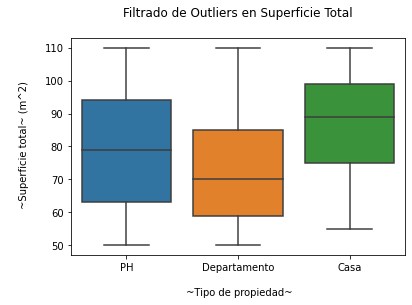

In [79]:
dat = quartil(data_new,'surface_total')
sns.boxplot(x=dat.property_type,y=dat.surface_total,data=dat)
plt.title ('Filtrado de Outliers en Superficie Total\n')
plt.xlabel('\n ~Tipo de propiedad~')                
plt.ylabel('\n ~Superficie total~ (m^2)\n') 
plt.show()

Se puede ver donde se encuentra la mayor cantidad de datos y analizarlo más claramente.

In [20]:
#Realizo una mascara para eliminar los valores de superfice cubierta mayores a superficie total
mask = dat.surface_total >= dat.surface_covered
dat = dat[mask]


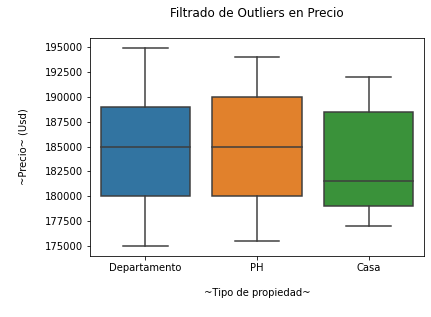

In [78]:
dat = quartil(dat,'price')
sns.boxplot(x=dat.property_type,y=data_new.price,data=dat)
plt.title ('Filtrado de Outliers en Precio\n')
plt.xlabel('\n ~Tipo de propiedad~ \n')                  
plt.ylabel('\n ~Precio~ (Usd) \n')   
plt.show()

Se ve que en los tres tipos de propiedades tienen precios similares donde se encuentra la mayor cantidad de datos.

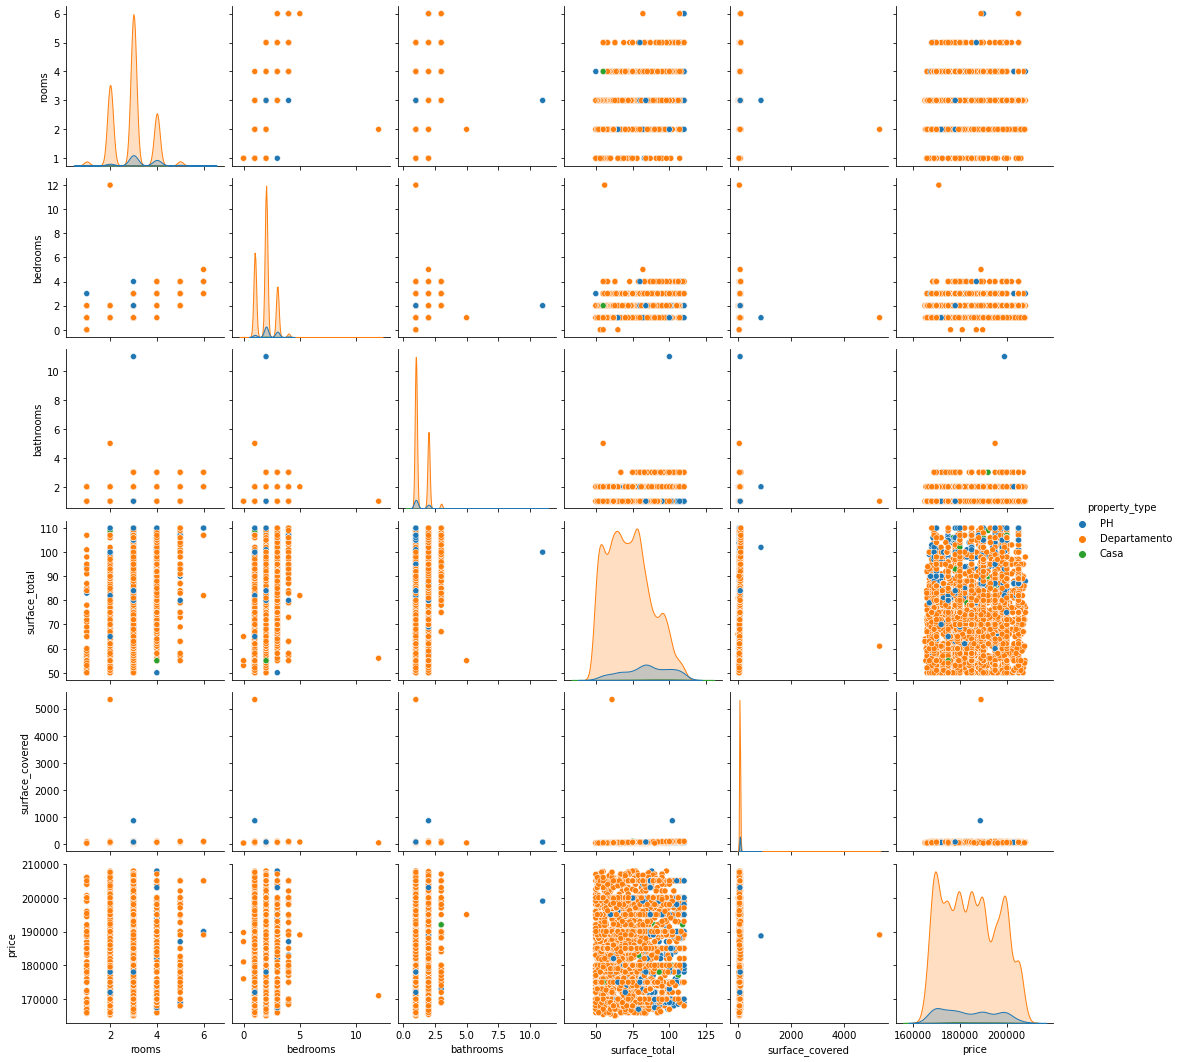

In [70]:
sns.pairplot(dat, hue = 'property_type')
plt.show()

En este tipo de gráfico se observa la relación entre las variables, de las cuales obtenemos una visión general de cómo se comportan.

7. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

In [23]:
corr = dat.corr()
corr

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
rooms,1.000000,0.954836,0.294843,0.581709,0.682611,0.229580
bedrooms,0.954836,1.000000,0.293658,0.580617,0.681370,0.231704
bathrooms,0.294843,0.293658,1.000000,0.321432,0.340441,0.253631
surface_total,0.581709,0.580617,0.321432,1.000000,0.829071,0.322212
surface_covered,0.682611,0.681370,0.340441,0.829071,1.000000,0.321872
price,0.229580,0.231704,0.253631,0.322212,0.321872,1.000000


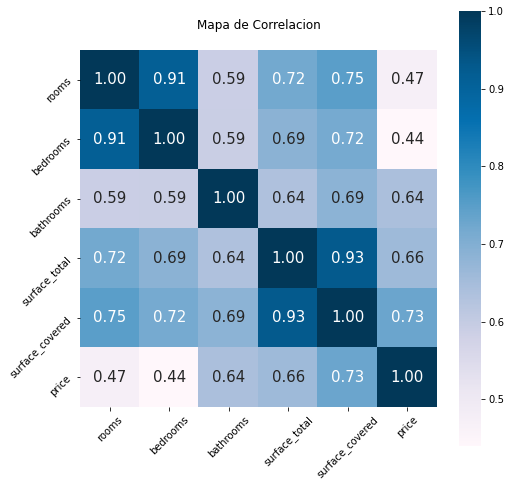

In [77]:
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
             xticklabels= corr.columns.values, 
             yticklabels= corr.columns.values, cmap= 'PuBu')
plt.title('Mapa de Correlacion\n')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

Las mejores variables que podríamos utilizar para predecir el precio son las más cercanas a 1 en la columna precio, entonces tomamos en primer lugar a surface_covered con 0.73, luego a surface_total con 0.66, hasta llegar a bedrooms con la peor correlación en 0.44.

### 2.1 Desafío

En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.


In [25]:
# ¿Cual es el barrio con mas Departamentos?
#Filtro los departamentos
mask = dat['property_type'] == 'Departamento'
dat1 = dat[mask]

# ¿Cual es el barrio con departamentos mas caros?
datp = dat1.sort_values('price',ascending = False)


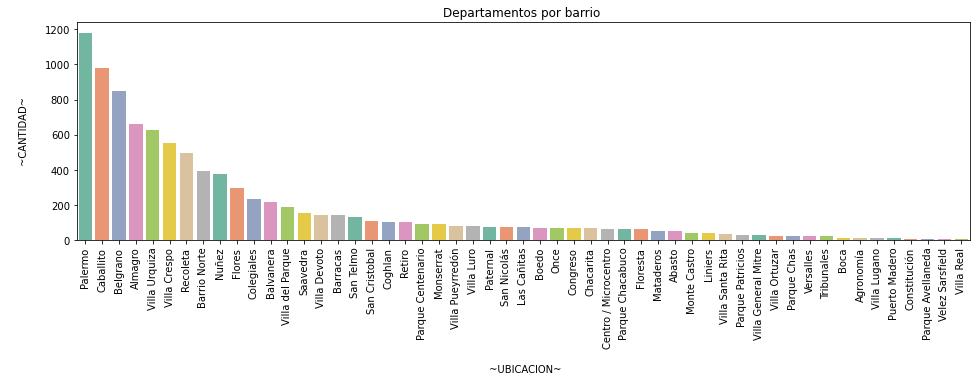

In [72]:
plt.figure(figsize = (16,4))
sns.countplot(data=datp,x = 'l3',order = datp['l3'].value_counts().index, palette = 'Set2')
plt.title('Departamentos por barrio ')
plt.xlabel('\n ~UBICACION~')                        
plt.ylabel('\n ~CANTIDAD~ \n')                   
plt.xticks(rotation = 90)                            
plt.show()

Vemos los barrios con mayor cantidad de departamentos en Capital Federal.

Filtro los datos repetidos del DataFrame.

In [27]:
dat_rep = datp[datp.duplicated()]
print('Cantidad de datos repetidos: ',dat_rep.shape)

Cantidad de datos repetidos:  (8279, 11)


In [28]:
#Visualizo la cantidad de datos
datp.count()

l1                 17610
l2                 17610
l3                 17610
rooms              17610
bedrooms           17610
bathrooms          17461
surface_total      17610
surface_covered    17610
price              17610
currency           17610
property_type      17610
dtype: int64

In [29]:
#Elimino las filas duplicadas 
datp = datp.drop_duplicates()
datp.count()

l1                 9331
l2                 9331
l3                 9331
rooms              9331
bedrooms           9331
bathrooms          9209
surface_total      9331
surface_covered    9331
price              9331
currency           9331
property_type      9331
dtype: int64

In [30]:
#Calculo la media de cada Barrio
barrios = datp['l3'].unique()

In [31]:
media = pd.DataFrame(columns=['Precio medio','Barrio'],index=range(len(barrios)))

k = 0                              
for i in barrios:
    media.iloc[k] = [datp[datp['l3'] == i].price.mean(),i]
    k += 1
    

In [32]:
#Ordeno y muestro la media
media = media.sort_values('Precio medio',ascending = False)
media

,Precio medio,Barrio
33,220047,Puerto Madero
3,196997,Recoleta
25,196296,Las Cañitas
13,193297,Barrio Norte
8,193180,Palermo
15,192560,Barracas
0,191169,Belgrano
12,190875,Nuñez
22,189301,Saavedra
2,187170,Villa Urquiza


Observo que Puerto madero es el Barrio con los departamentos más caros, seguido de Recoleta y las Cañitas completando el podio. Este resultado es interesante, aunque puede estar sesgado por outliers como precios muy elevados que varían la media o por poca cantidad datos. 

Evalúo los barrios más caros con mayor cantidad de propiedades.


In [33]:
barrio = ['Palermo','Almagro','Belgrano','Villa Urquiza','Caballito','Villa Crespo','Recoleta','Barrio Norte','Nuñez','Flores']
media = pd.DataFrame(columns=['Precio medio','Barrio'],index=range(len(barrio)))

k = 0                              
for i in barrio:
    media.iloc[k] = [datp[datp['l3'] == i].price.mean(),i]
    k += 1
    

In [34]:
#Ordeno y muestro la media
media = media.sort_values('Precio medio',ascending = False)
media

,Precio medio,Barrio
6,196997,Recoleta
7,193297,Barrio Norte
0,193180,Palermo
2,191169,Belgrano
8,190875,Nuñez
3,187170,Villa Urquiza
4,185195,Caballito
1,183171,Almagro
5,180316,Villa Crespo
9,178871,Flores


Tomando en cuenta los barrios con mayor cantidad de propiedades, se visualiza que Recoleta puede ser el Barrio más caro.

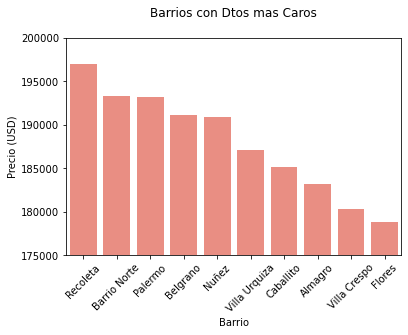

In [76]:

sns.barplot(data = media, x = 'Barrio', y='Precio medio',color = 'salmon')
plt.title('Barrios con Dtos mas Caros\n')
plt.ylabel('Precio (USD)')
plt.ylim(175000,200000)
plt.xticks(rotation = 45)
plt.show()


Recoleta es el barrio con departamentos de precio de media más caros.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81019 instacias y 6 columnas.

In [7]:
#Cargo el DataFrame de Properati nuevamente
data_ML = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')

In [8]:
#Realizo los filtros pedidos en el enunciado 
data_ML = data_ML[(data_ML['l2'] == 'Capital Federal') & (data_ML['surface_total'] <= 1000) & (data_ML['surface_total'] >= 15) & (data_ML['price'] <= 4000000)]
prop_three = ['Departamento','PH','Casa']                          
data_ML = data_ML[data_ML['property_type'].isin(prop_three)]
#Selecciono las columnas pedidas
data_ML1 = data_ML[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price']]
#Elimino los valores vacios
data_ML2 = data_ML1.dropna()
#Obtengo el tamaño deseado
data_ML2.shape


(81019, 6)

In [9]:
#filtro las superficies para obtener valores mas razonables
data_ML2 = data_ML2[data_ML2.surface_covered <= data_ML2.surface_total]

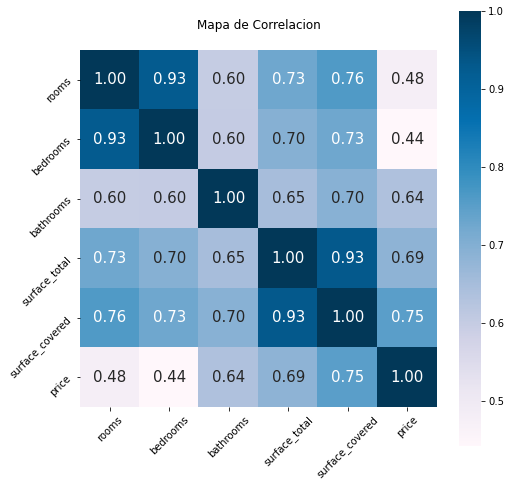

In [10]:
#Realizo la correlacion para poder aplicar los modelos de ML correctamente
corr = data_ML2.corr()

plt.figure(figsize=(8,8))

sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
             xticklabels= corr.columns.values, 
             yticklabels= corr.columns.values, cmap= 'PuBu')
plt.title('Mapa de Correlacion\n')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

En este mapa de correlaciones, vemos la correlación de las variables con respecto al precio, que es nuestro valor a predecir, donde la superficie y el baño son las que obtienen la mayor correlación.

### Variables Importantes

Como se plantea en el Proyecto, lo que queremos predecir es el precio de venta de una propiedad, por lo que la variable a predecir será Price. 
Las variables restantes serán las que utilizaremos para predecir el precio.


#### Metrica a Utilizar

La métrica con la que evaluare el modelo de regresión es la raíz del error cuadrado promedio (RMSE), es sensible a valores atípicos al igual que el error cuadrado promedio (MSE), puedo trabajar con las mismas unidades y magnitudes que la variable, no así con el MSE al estar elevado al cuadrado. 

A menor valor de RMSE, mejor es el regresor. En el caso ideal, los errores serán 0.



In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

### Modelo Regresion

Comienzo definiendo las variables que serán usadas para entrenar mis modelos de Regresión, utilizo surface_covered y bathrooms que son las 2 variables que muestras la mejor correlación respecto al precio.

#### Modelo Benchmark 




In [12]:
# Cargo las variables con mayor correlacion respecto de precio 

X = data_ML2[['surface_covered','bathrooms']]
y = data_ML2.price

# Chequeo los tamaños

print(X.shape)
print(y.shape)

(80276, 2)
(80276,)


In [13]:
# Divido las muestras para luego poder testearlo
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(56193, 2) (56193,) (24083, 2) (24083,)


In [14]:
#Entreno el modelo
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

In [15]:
# Aplico la metrica RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'\nRaíz del error cuadrático medio en Train: {rmse_train}\n')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}\n')


Raíz del error cuadrático medio en Train: 191056.43988243205

Raíz del error cuadrático medio en Test: 194474.27121801677



Este modelo tiene el RMSE de train y test más cercanos, aunque posee  underfiting.

In [16]:
#Guardo el Error
Err = pd.DataFrame(columns=['Error','Valor'],index=range(10))
Err.iloc[0,0] = 'RMSE train Benchmark'
Err.iloc[0,1] = rmse_train
Err.iloc[1,0] = 'RMSE test Benchmark'
Err.iloc[1,1] = rmse_test

C:\Users\usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


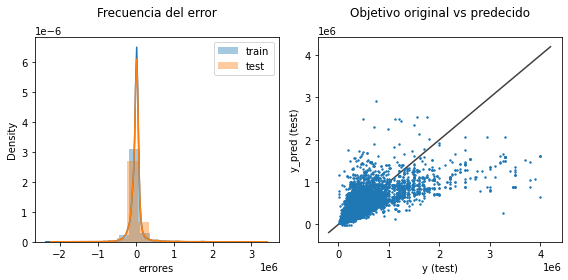

In [17]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.title('Frecuencia del error\n')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)  
plt.title('Objetivo original vs predecido\n')
lims = [np.min([ax.get_xlim(), ax.get_ylim()]),  
np.max([ax.get_xlim(), ax.get_ylim()]),]  
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

En la gráfica de la izquierda podemos ver los errores de RMSE que representan el error global del regresor que son similares tanto para test como para train.
Los histogramas de los errores son simétricos, aproximadamente gaussianos, y parecidos para ambos conjuntos. Esto es un indicador de que estamos aproximando a nuestros datos de manera correcta.
En la gráfica derecha podemos como los valores tienden a 0 esto se debe a valores en los precios muy grandes (outliers).



### Modelo K-Vecinos y Arbol de desicion con 2 variables 

In [18]:
tree_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=3)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 176592.3991974586
Raíz del error cuadrático medio en Test: 183974.8955181764


C:\Users\usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


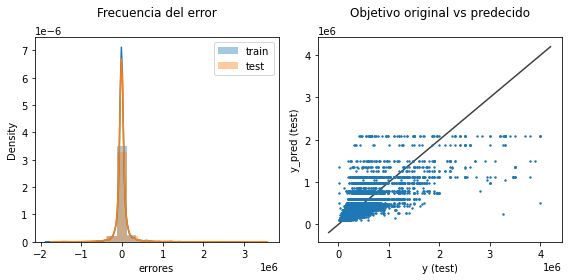

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 157660.21319132307
Raíz del error cuadrático medio en Test: 186944.90283047513


C:\Users\usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


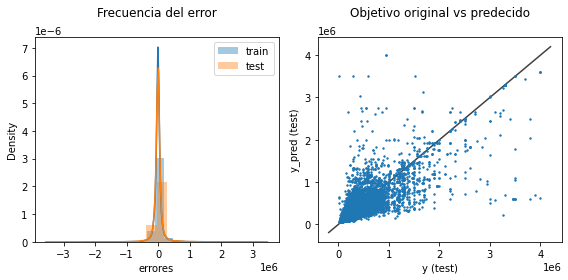

In [19]:
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']
k = 0
for i, model in enumerate([tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    Err.iloc[2+k,0] = f'RMSE train 2 variables modelo:   {modelos[i]}'
    Err.iloc[2+k,1] = rmse_train
    Err.iloc[3+k,0] = f'RMSE test 2 variables modelo:    {modelos[i]}'
    Err.iloc[3+k,1] = rmse_test
    k += 2
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.title('Frecuencia del error\n')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
    plt.title('Objetivo original vs predecido\n')
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

En ambas graficas de la izquierda vemos que el RMSE entre train y test es mejor en el de Vecinos más cercanos al tener valores más cercanos y en la gráfica de la derecha se ven comportamientos similares tendiendo a 0 en ambos, pero con formas características particulares de cada modelo.

### Definiendo la cantidad de K-Vecinos con 2 variables 

In [20]:
lista_rmse_train = []
lista_rmse_test = []

k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

for k in k_vecinos:
    
    vecinos = KNeighborsRegressor(n_neighbors= k) 
    vecinos.fit(X_train,y_train)
    
    y_train_pred = vecinos.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
    
    y_test_pred = vecinos.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
    

    # Agregar la información a las listas
    lista_rmse_train.append(rmse_train)
    lista_rmse_test.append(rmse_test)
    

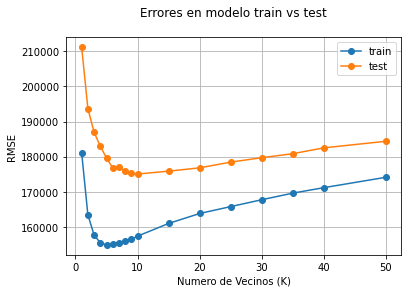

In [21]:
plt.plot(k_vecinos,lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos,lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.title('Errores en modelo train vs test\n')
plt.xlabel('Numero de Vecinos (K)')
plt.ylabel('RMSE')
plt.show()

El modelo a mayor cantidad de K-Vecinos aprendió menos, ocurrió a la inversa con menor cantidad de K-Vecinos, donde el modelo aprendió más, obteniendo así un mejor desempeño. El mejor desempeño lo observo en 10 K-Vecinos disminuyendo el underfiting y el overfiting.

### Definiendo la profundidad con 2 variables 

In [22]:
lista_adrmse_train = []
lista_adrmse_test = []

k_prof = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

for k in k_prof:
    
    ad = DecisionTreeRegressor(max_depth = k) 
    ad.fit(X_train,y_train)
    
    y_train_pred = ad.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
    
    y_test_pred = ad.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
    
    lista_adrmse_train.append(rmse_train)
    lista_adrmse_test.append(rmse_test)
    

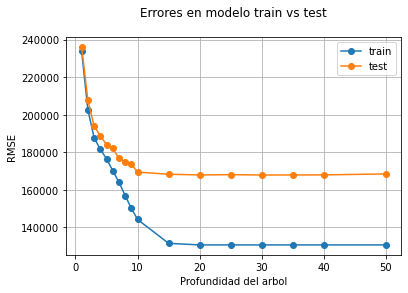

In [23]:
plt.plot(k_prof,lista_adrmse_train,'o-',label='train' )
plt.plot(k_prof,lista_adrmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.title('Errores en modelo train vs test\n')
plt.xlabel('Profundidad del arbol')
plt.ylabel('RMSE')
plt.show()

Podemos ver que a medida que aumentamos la profundidad del árbol el modelo mejora hasta un punto en donde ya no obtenemos mejora, puedo observar que una buena profundidad es de 10.

### Evaluo nuevamente los modelos con mas variables 

### K-Vecinos con 5 variables 

In [24]:
X = data_ML2[['surface_covered','bathrooms','rooms','surface_total','bedrooms']]
y = data_ML2.price

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
lista_rmse_train = []
lista_rmse_test = []

k_vecinos = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

for k in k_vecinos:
    
    vecinos = KNeighborsRegressor(n_neighbors= k) 
    vecinos.fit(X_train,y_train)
    
    y_train_pred = vecinos.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
    
    y_test_pred = vecinos.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
    
    # Agregar la información a las listas
    lista_rmse_train.append(rmse_train)
    lista_rmse_test.append(rmse_test)
    

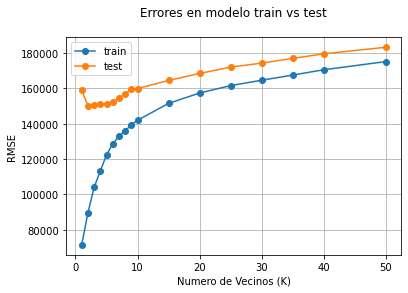

In [27]:
plt.plot(k_vecinos,lista_rmse_train,'o-',label='train' )
plt.plot(k_vecinos,lista_rmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.title('Errores en modelo train vs test\n')
plt.xlabel('Numero de Vecinos (K)')
plt.ylabel('RMSE')
plt.show()

Con el aumento de variables el modelo respondió mejor con menos K-Vecinos y disminuyo el error, tomo 5 K-Vecinos.

### Arbol de Desicion con 5 variables 

In [28]:
lista_adrmse_train = []
lista_adrmse_test = []

k_prof = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]

for k in k_prof:
    
    ad = DecisionTreeRegressor(max_depth = k) 
    ad.fit(X_train,y_train)
    
    y_train_pred = ad.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred))
    
    y_test_pred = ad.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
    
    lista_adrmse_train.append(rmse_train)
    lista_adrmse_test.append(rmse_test)
    

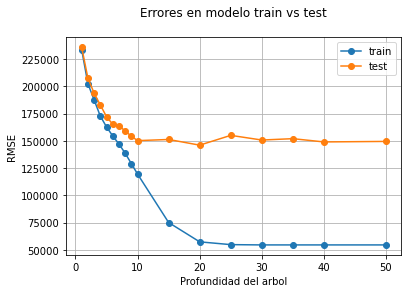

In [29]:
plt.plot(k_prof,lista_adrmse_train,'o-',label='train' )
plt.plot(k_prof,lista_adrmse_test,'o-',label='test')
plt.grid(True)
plt.legend()
plt.title('Errores en modelo train vs test\n')
plt.xlabel('Profundidad del arbol')
plt.ylabel('RMSE')
plt.show()

Se ve una mejora significativa con respecto al error, no varia en gran medida la elección de la profundidad, voy a seleccionar la profundidad de 10.

### Calculo final del error 

In [30]:
X = data_ML2[['surface_covered','bathrooms','rooms','surface_total','bedrooms']]
y = data_ML2.price

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [32]:
tree_regressor = DecisionTreeRegressor(max_depth=10, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=6)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 119536.88066366651
Raíz del error cuadrático medio en Test: 151750.71398058665


C:\Users\usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


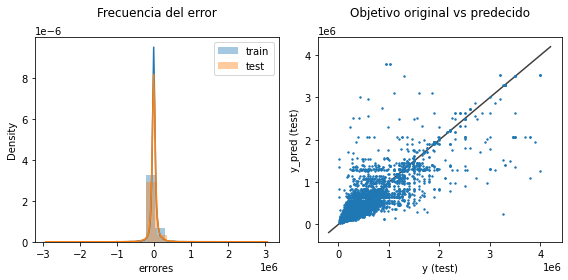

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 128544.04130233925
Raíz del error cuadrático medio en Test: 152515.55202515685


C:\Users\usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\usuario\miniconda3\envs\datascience\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


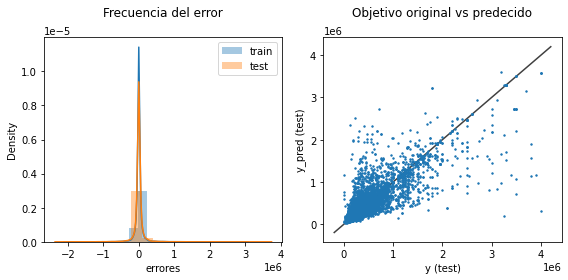

In [33]:
modelos = ['Árbol de Decisión', 'Vecinos más cercanos']
k = 0
for i, model in enumerate([tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    Err.iloc[6+k,0] = f'RMSE train 5 variables modelo:  {modelos[i]}'
    Err.iloc[6+k,1] = rmse_train
    Err.iloc[7+k,0] = f'RMSE test 5 variables modelo:  {modelos[i]}'
    Err.iloc[7+k,1] = rmse_test
    k += 2
    
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.title('Frecuencia del error\n')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    plt.title('Objetivo original vs predecido\n')
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

### Conclusión

Podemos ver cómo han mejorado los modelos con respecto al utilizado al comienzo (Benchmark) con el agregado de variables y las modificaciones necesarias dependiendo del modelo.

Adopto el modelo de **Vecinos más cercanos** con 6 K-Vecinos y 5 variables por tener un RMSE(test) "bajo" y un menor overfiting. Considero que el valor del error es alto y que el modelo podría ajustar mejor.

Las variables utilizadas parecen lógicas y representativas. Sin embargo, las variables rooms y bedrooms tienen una baja correlación y surface total es algo que ayuda, pero podría omitirla al estar la variable surface covered que tiene información muy similar.

En mi opinión, hay variables ausentes que pueden tener peso en el modelo de predicción, como 'Antigüedad' o una valoración en la calidad de la construcción. 

Finalmente encuentro factible aclarar que la variable precio nos dificulta el análisis al tener precios muy elevados, generando gráficas y valores lejanos de lo esperado.


In [34]:
Err

,Error,Valor
0,RMSE train Benchmark,191056
1,RMSE test Benchmark,194474
2,RMSE train 2 variables modelo: Árbol de Deci...,176592
3,RMSE test 2 variables modelo: Árbol de Deci...,183975
4,RMSE train 2 variables modelo: Vecinos más c...,157660
5,RMSE test 2 variables modelo: Vecinos más c...,186945
6,RMSE train 5 variables modelo: Árbol de Decisión,119537
7,RMSE test 5 variables modelo: Árbol de Decisión,151751
8,RMSE train 5 variables modelo: Vecinos más ce...,128544
9,RMSE test 5 variables modelo: Vecinos más cer...,152516


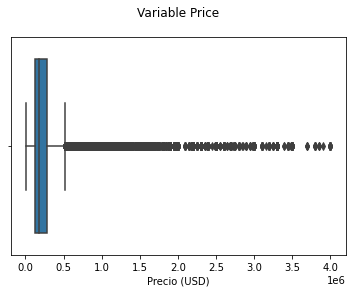

In [35]:
sns.boxplot(data = data_ML2, x = 'price')
plt.title('Variable Price\n')
plt.xlabel('Precio (USD)')
plt.show()

Se puede ver claramente el sesgo que produce esta variable. 